# QPG with parameter array $[[12, 4, 4, 24], [6, 0, 3; 0, 1; 2]]$

Consider a parameter set for a $4$-class association scheme $\mathcal{A} = (X, \mathcal{R} = \{R_0 = \operatorname{Id}_X, R_1, R_2, R_3, R_4\})$ with $45$ vertices with the intersection numbers $p^h_{ij}$ ($0 \le h, i, j \le 4$) given below.

In [1]:
%display latex
import drg
from eigenspace import Eigenspace, VectorError, relmatrix

In [2]:
p = drg.ASParameters(p=list(zip(*
    [ [ [ 1,  0, 0, 0,  0 ], [ 0, 1, 0, 0,  0 ], [ 0, 0, 1, 0,  0 ], [ 0,  0, 0, 1,  0 ], [ 0, 0, 0, 0,  1 ] ], 
      [ [ 0, 12, 0, 0,  0 ], [ 1, 3, 2, 0,  6 ], [ 0, 6, 0, 0,  6 ], [ 0,  0, 0, 0, 12 ], [ 0, 3, 1, 2,  6 ] ], 
      [ [ 0,  0, 4, 0,  0 ], [ 0, 2, 0, 0,  2 ], [ 1, 0, 1, 2,  0 ], [ 0,  0, 2, 2,  0 ], [ 0, 1, 0, 0,  3 ] ], 
      [ [ 0,  0, 0, 4,  0 ], [ 0, 0, 0, 0,  4 ], [ 0, 0, 2, 2,  0 ], [ 1,  0, 2, 1,  0 ], [ 0, 2, 0, 0,  2 ] ], 
      [ [ 0,  0, 0, 0, 24 ], [ 0, 6, 2, 4, 12 ], [ 0, 6, 0, 0, 18 ], [ 0, 12, 0, 0, 12 ], [ 1, 6, 3, 2, 12 ] ] ]
)))
p.Q.change_ring(SR).simplify()

[           1           10           20            4           10]
[           1  5/2*sqrt(2)            0           -1 -5/2*sqrt(2)]
[           1          5/2          -10            4          5/2]
[           1           -5            5            4           -5]
[           1 -5/4*sqrt(2)            0           -1  5/4*sqrt(2)]

The graph $\Gamma_1 = (X, R_1)$ is a quotient-polynomial graph with parameter array $[[12, 4, 4, 24], [6, 0, 3; 0, 1; 2]]$. From the intersection numbers and the dual eigenmatrix above, we can see that the association scheme $\mathcal{A}$ is imprimitive with imprimitivity set $\tilde{0} = \{0, 2, 3\}$ and dual imprimitivity set $\overline{0} = \{0, 3\}$. Note that we also have $\overline{1} = \overline{4} = \{1, 4\}$ and $\overline{2} = \{2\}$. Let us examine the parameters of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$.

In [3]:
p23 = p.subset(2, 3)
p23.p

0: [1 0 0]
   [0 4 0]
   [0 0 4]

1: [0 1 0]
   [1 1 2]
   [0 2 2]

2: [0 0 1]
   [0 2 2]
   [1 2 1]

These parameters uniquely define the association scheme corresponding to the graph $K_3 \square K_3$. Let us also examine its dual eigenmatrix.

In [4]:
p23.Q

[ 1  4  4]
[ 1  1 -2]
[ 1 -2  1]

We will consider embeddings of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$ into its eigenspace $S_1$ of dimension $m_1 = 10$. Let us obtain the inner products (i.e., cosines of the angles) between unit vectors $u'_x$ for the vertices $x \in X$ corresponding to the relation they are in.

In [5]:
si = 1
m = p.Q[0, si]
angles, = zip(*(p.Q[:, si] / p.Q[0, si]))
[SR(x).simplify() for x in angles]

[1, 1/4*sqrt(2), 1/4, -1/2, -1/8*sqrt(2)]

Since the graphs $(X, R_2)$ and $(X, R_3)$ are both isomorphic to $5 K_3 \square K_3$, we may consider a single $(R_2 \cup R_3)$-clique $X_1$ and find the coefficients for the vectors $u'_x$ ($x \in X_1$).

In [6]:
S = Eigenspace(m, angles)
G11 = Graph(9)
G21 = Graph([range(9), lambda u, v: (u % 3 == v % 3) ^^ (u // 3 == v // 3)])
G31 = G21.complement()
R1 = relmatrix(G11, G21, G31, vcs=range(9))
S.vectors(R1)

[               1              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[             1/4   1/4 * sqrt(15)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[             1/4  1/20 * sqrt(15)  3/10 * sqrt(10)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[             1/4 -3/20 * sqrt(15) -3/20 * sqrt(10)    1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/2  1/10 * sqrt(15) -3/20 * sqrt(10)    1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/2 -1/10 * sqrt(15)  3/20 * sqrt(10)    1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]
[             1/4 -3/20 * sqrt(15) -3/20 * sqrt(10)   -1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/2  1/10 * sqrt(15) -3/20 * sqrt(10)   -1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/2 -1/10 * sqrt(15)  3/20 * sqrt(10)   -1/4 * sqrt(6)              (0)              (0)              (0)              (0)              (0)              (0)]

Note that the maximal $R_2$-cliques are of size $3$ - we will call them *lines* (thus forming a $\operatorname{GQ}(2, 1)$ geometry with vertices as its points). Note that there is at most one line through each pair of vertices. There are six lines in each $(R_2 \cup R_3)$-clique, and they can be partitioned into two *spreads* (i.e., sets of lines covering each point precisely once) with three lines each.

Let us now consider two $(R_2 \cup R_3)$-cliques, say, $X_1$ and $X_2$, and define $X^{(2)} = X_1 \cup X_2$ and the graph $\Gamma^{(2)}_1 = (X^{(2)}, R_1|_{X^{(2)}})$. Since $p^1_{12} = 2$ and $p^1_{13} = 0$, it follows that each vertex of $X_\ell$ is adjacent to three vertices in a line of $X_{\ell'}$ ($\{\ell, \ell'\} = \{1, 2\}$). Suppose that the vertex $x_1 \in X_1$ is in lines $L_1$ and $L_2$ of $X_1$, and is adjacent to the vertices $y_1, y_2, y_3 \in X_2$ forming a line of $X_2$. Then at least two of these vertices, say $y_1$ and $y_2$, are adjacent to the vertices of one of the aforementioned lines of $X_1$, say, $L_1$. Since the set of neighbours of a vertex in $X_1$ forms a line in $X_2$, it follows that $y_3$ is also adjacent to the vertices of $L_1$. Therefore, the graph $\Gamma^{(2)}_1$ is isomorphic to $3K_{3,3}$, with the partitions of vertices of $X_\ell$ $(\ell = 1, 2)$ corresponding to the connected components of $\Gamma^{(2)}_1$ coinciding with a spread on $X_\ell$. Let us try to find the coefficients for the vectors $u'_x$ ($x \in X^{(2)}$).

In [7]:
G12 = Graph([range(18), lambda u, v: u // 9 != v // 9 and (u // 3) % 3 == (v // 3) % 3])
G22 = 2*G21
G32 = 2*G31
R2 = relmatrix(G12, G22, G32, vcs=range(18))
S.vectors(R2).change_ring(SR)

[             1              0              0              0              0              0              0              0              0              0]
[           1/4   1/4*sqrt(15)              0              0              0              0              0              0              0              0]
[           1/4  1/20*sqrt(15)  3/10*sqrt(10)              0              0              0              0              0              0              0]
[           1/4 -3/20*sqrt(15) -3/20*sqrt(10)    1/4*sqrt(6)              0              0              0              0              0              0]
[          -1/2  1/10*sqrt(15) -3/20*sqrt(10)    1/4*sqrt(6)              0              0              0              0              0              0]
[          -1/2 -1/10*sqrt(15)  3/20*sqrt(10)    1/4*sqrt(6)              0              0              0              0              0              0]
[           1/4 -3/20*sqrt(15) -3/20*sqrt(10)   -1/4*sqrt(6)              0              0              0              0              0              0]
[          -1/2  1/10*sqrt(15) -3/20*sqrt(10)   -1/4*sqrt(6)              0              0              0              0              0              0]
[          -1/2 -1/10*sqrt(15)  3/20*sqrt(10)   -1/4*sqrt(6)              0              0              0              0              0              0]
[   1/4*sqrt(2)  1/20*sqrt(30)   1/10*sqrt(5)              0    1/2*sqrt(3)              0              0              0              0              0]
[   1/4*sqrt(2)  1/20*sqrt(30)   1/10*sqrt(5)              0              0    1/2*sqrt(3)              0              0              0              0]
[   1/4*sqrt(2)  1/20*sqrt(30)   1/10*sqrt(5)              0              0              0    1/2*sqrt(3)              0              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)    1/4*sqrt(3)    1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)    1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)    1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)    1/4*sqrt(3)              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)   -1/4*sqrt(3)    1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)   -1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)              0              0]
[  -1/8*sqrt(2) -1/40*sqrt(30)  -1/20*sqrt(5)   -1/4*sqrt(3)   -1/4*sqrt(3)   -1/4*sqrt(3)    1/4*sqrt(3)   -1/4*sqrt(3)              0              0]

Next, we consider three $(R_2 \cup R_3)$-cliques, say, $X_1$, $X_2$ and $X_3$, and define $X^{(3)} = X_1 \cup X_2 \cup X_3$. There are six mutually non-isomorphic possibilities for the graph $\Gamma^{(3)}_1 = (X^{(3)}, R_1|_{X^{(3)}})$: either the same spread is used in each of $X_1, X_2, X_3$ to determine the edges to the other two $(R_2 \cup R_3)$-cliques, and $\Gamma^{(3)}_1$ has one, two or three connected components, or different spreads are used for one, two or three of $X_1, X_2, X_3$. The choice of this graph thus uniquely determines the scheme $\mathcal{A}|_{X^{(3)}}$. Let us try to find the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) in each of these cases.

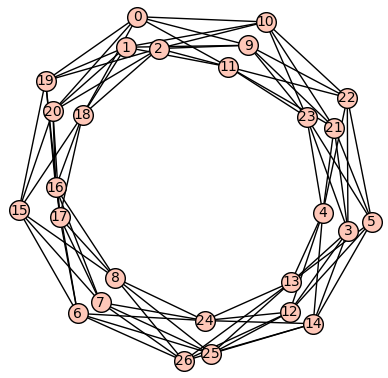

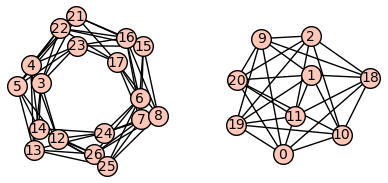

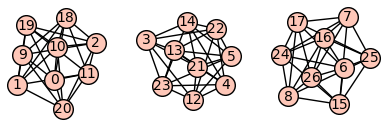

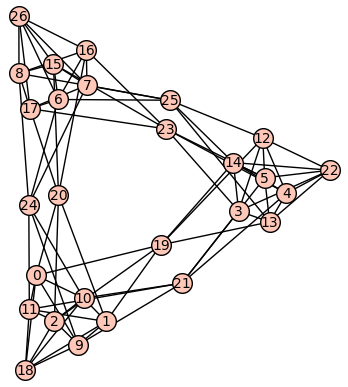

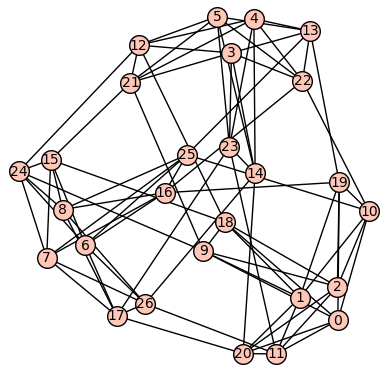

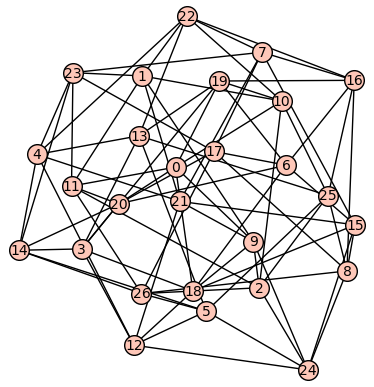

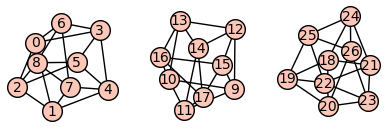

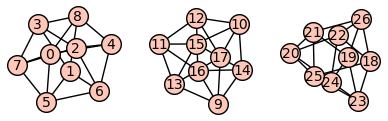

In [8]:
G13s = [Graph([*G12.edges(labels=False),
               *(((2+a)*h + (2-a)*i, 18 + 3*h + j) for h in range(3) for i in range(3) for j in range(3)),
               *((9 + (2+b)*h + (2-b)*i, 18 + (2+c)*t[h] + (2-c)*j) for h in range(3) for i in range(3) for j in range(3))])
               for a, b, c, t in [(1, 1, 1, [1, 2, 0]), (1, 1, 1, [0, 2, 1]), (1, 1, 1, range(3)),
                                  (1, 1, -1, range(3)), (1, -1, -1, range(3)), (-1, -1, -1, range(3))]]
G23 = 3*G21
G33 = 3*G31
for H in (*G13s, G23, G33):
    H.show()

In [9]:
R3s = [relmatrix(G13, G23, G33, vcs=range(27)) for G13 in G13s]
d = {}
for i, R in enumerate(R3s):
    try:
        d[i] = S.vectors(R)
        print(f"Graph {i}: found embedding!")
    except VectorError as ex:
        print(f"Graph {i}: {ex} (row {ex.row}, diff {ex.diff})")
len(d)

Graph 0: The norm of the obtained vector is larger than one! (row 18, diff e/12)
Graph 1: The norm of the obtained vector is smaller than one! (row 20, diff (3*e + 45)/46)
Graph 2: The norm of the obtained vector is smaller than one! (row 20, diff (3*e + 45)/46)
Graph 3: The norm of the obtained vector is larger than one! (row 19, diff 3*e/32)
Graph 4: found embedding!
Graph 5: The norm of the obtained vector is smaller than one! (row 20, diff 9/20)


1

We see that the scheme $\mathcal{A}|_{X^{(3)}}$ only admits an embedding into $S_1$ if different spreads are used to determine the edges from two of the three $(R_2 \cup R_3)$-cliques. Let us examine the matrix of the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) in this case.

In [10]:
d[4].change_ring(SR)

27 x 10 dense matrix over Symbolic Ring (use the '.str()' method to see the entries)

Since the matrix of the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) has full column rank, the orthonormal basis in which these vectors are expressed is uniquely determined, allowing us to attempt to find the unit vectors $u'_y$ for the remaining vertices $y$. By the argument above, each of these vertices is adjacent to the vertices of a line in each of $X_1, X_2, X_3$.

In [11]:
cl = G21.cliques_maximal()
vs = []
for a in cl:
    for b in cl:
        for c in cl:
            abc = (a, b, c)
            r = [1 if h % 9 in abc[h // 9] else 4 for h in range(27)]
            try:
                v = S.vector(d[4], r)
                if v.norm() == 1:
                    vs.append(v)
            except VectorError:
                pass
len(vs)

0

We find no further vectors, which means that the association scheme $\mathcal{A}$ **does not exist**.